In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount(r'/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [2]:
import os
os.chdir("/content/gdrive/MyDrive/Twitter_NER_nlp/")
os.getcwd()

'/content/gdrive/MyDrive/Twitter_NER_nlp'

In [3]:
!pip install tensorflow==2.15.0 tensorflow-addons==0.22.0
!pip install keras==2.15.0
!pip install keras-preprocessing
!pip install wordninja wordcloud contractions pyspellchecker transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.3/612.3 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.3 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.2
    Uninstalling typeguard-4.4.2:
      Successfully uninstalled typeguard-4.4.2
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfull

# Named Entity Recognition (NER) for Twitter Data  

## **Problem Statement**  
Twitter is a microblogging and social networking platform where millions of tweets are generated daily. To analyze trends and extract meaningful insights, Twitter aims to develop an automated system to identify named entities in tweets without relying on user-defined hashtags. This system will recognize various entity types, including persons, locations, companies, and other named categories, despite inconsistencies in user-generated text.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime,timedelta
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
import time
import re
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier

from itertools import product
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix,classification_report,ndcg_score
from sklearn.metrics import roc_auc_score,roc_curve,auc, precision_score, recall_score, precision_recall_curve
from copy import deepcopy
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
#from lime.lime_tabular import LimeTabularExplainer
#import shap
import wordninja
#from beautifultable import BeautifulTable
from scipy import stats
import itertools
from IPython.display import display
import shutil
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)


import gensim.downloader as api
import gc
from transformers import BertTokenizer
from collections import defaultdict


import re
import string
import unicodedata
import contractions
from collections import Counter

from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import spacy
#from wordsegment import load, segment
from wordcloud import WordCloud
from spellchecker import SpellChecker
spell=SpellChecker()

nlp = spacy.load("en_core_web_sm")
nltk.download("punkt")
nltk.download('punkt_tab')
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')
#load()

from keras_preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow.keras.backend as K
from keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Bidirectional, Layer
from tensorflow_addons.layers import CRF
from tensorflow_addons.optimizers import AdamW
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import ndcg_score
from keras.initializers import Constant
from transformers import TFBertForTokenClassification, BertConfig
#from tensorflow.keras.models import Model


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.models import load_model
from tqdm import tqdm
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, TensorBoard
import os
import datetime
import joblib

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [5]:

def uncleaned_procure_datatset(file_path):
    data = []
    sentence_id = 0

    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            line = line.strip()
            if not line:
                sentence_id += 1  # Increment sentence ID when a new sentence starts
            else:
                parts = line.split()
                word, label = parts[0], parts[-1]
                label1=label
                if label1!="O":
                  label1="E"   #just an entity

                # Some string preprocessing
                word=word.strip().lower()
                if word=="'":
                  word=[word]
                else:
                  if word[0]=="'" and sentence_id==data[-1][0]:
                      word = [contractions.fix(data[-1][1]+word).split()[-1]]
                  else:
                      word=contractions.fix(word).split()

                for i in range(len(word)):
                  data.append((sentence_id, word[i], label,label1))

    df = pd.DataFrame(data, columns=["SentenceID", "Sentence", "Label","Label_modified"])

    grouped = df.groupby("SentenceID").agg({"Sentence": list, "Label": list,"Label_modified": list}).reset_index()

    return df,grouped


# strip spaces from words
# lowercase them for training from scratch.. for bert keep it asd it is
# expand contractions -- in which case extra same label added for every expanded word
# replace mentions/urls with a placeholder

# next step can be spell correct each token

file_path = "wnut 16.txt.conll"  ##test dataset has more data here

train_df,train_dataset=uncleaned_procure_datatset(file_path)

In [6]:


class CustomTokenizer:
    def __init__(self, embedding_dim=200):
        self.spell = SpellChecker()
        self.word2idx = {}
        self.label2idx = {}
        self.idx2word = {}
        self.idx2label = {}

        self.embedding_dim = embedding_dim
        self.embedding_matrix = None

        # Load pre-trained Word2Vec embeddings
        print("Loading pre-trained Word2Vec embeddings...")
        self.word2vec = api.load("word2vec-google-news-300")
        print("Word2Vec loaded!")



    def clean_text(self, sentence):
        tokens = sentence  # Tokenize text

        # Replace special tokens
        tokens = [re.sub(r"https?://\S+|www\.\S+", "<URL>", word) for word in tokens]
        tokens = [re.sub(r"@[A-Za-z0-9_]+", "<MENTION>", word) for word in tokens]
        tokens = [re.sub(r"\brt\b", "<RT>", word) for word in tokens]
        tokens = [wordninja.split(word) if len(re.findall(r'[^a-zA-Z]',word))==0 else [word] for word in tokens]  # Split concatenated words
        tokens = [subword for word in tokens for subword in word]  # Flatten list

        ignore_toks=["<URL>","<MENTION>","<RT>"]
        pos_tags = pos_tag(tokens)
        non_nouns = [word for word, tag in pos_tags if not tag.startswith("NN")]  # Non-nouns


        # Spell check only non-noun words
        tokens = [
            self.spell.correction(word) if (word not in self.spell.known([word])) and (word not in ignore_toks) and
            (word in non_nouns) and (self.spell.correction(word) is not None) else word
            for word in tokens
        ]

        return tokens

    def update_labels(self,original_tokens, cleaned_tokens, labels):
      #print(original_tokens,"\n", cleaned_tokens,"\n", labels)
      new_labels = []
      original_idx = 0
      label="O"

      for cleaned_word in cleaned_tokens:
          if original_idx < len(original_tokens)-1 and cleaned_word in original_tokens[original_idx]:
              label = labels[original_idx]
              new_labels.append(label)
          elif original_idx < len(original_tokens)-1 and cleaned_word in original_tokens[original_idx+1]:
              label = labels[original_idx+1]
              original_idx += 1
              new_labels.append(label)
          else:
              new_labels.append(label)  # Maintain previous label for expanded parts

      return new_labels


    def fit(self, dataset):
        sentences, labels = [], []

        for i in tqdm(range(len(dataset)),desc='Cleaned Train Text', total= len(dataset)):
            sentence=dataset[i][0]
            label=dataset[i][1]

            cleaned_tokens = self.clean_text(sentence)
            updated_labels = self.update_labels(sentence, cleaned_tokens, label)

            sentences.append(cleaned_tokens)
            labels.append(updated_labels)



        # Create word and label indices
        unique_words = {word for sent in sentences for word in sent}
        unique_labels = {label for label_seq in labels for label in label_seq}

        self.word2idx = {word: idx for idx, word in enumerate(unique_words, start=2)}
        self.word2idx["<PAD>"] = 0  # Padding token
        self.word2idx["<UNK>"] = 1 # Unknown words
        self.label2idx = {label: idx for idx, label in enumerate(unique_labels, start=1)}
        self.label2idx["<PAD>"] = 0

        self.idx2word = {idx: word for word, idx in self.word2idx.items()}
        self.idx2label = {idx: label for label, idx in self.label2idx.items()}

        self._load_embeddings()  # Load embeddings from pre-trained Word2Vec
        return sentences, labels

    def _load_embeddings(self):
        """ Load embeddings from pre-trained Word2Vec and reduce dimensions if needed """
        print("Creating embedding matrix...")
        num_tokens = len(self.word2idx)
        self.embedding_matrix = np.zeros((num_tokens, self.embedding_dim))

        hits, misses = 0, 0
        valid_vectors = []
        valid_indices = []

        for word, i in self.word2idx.items():
            if word in self.word2vec:
                embedding_vector = self.word2vec[word]
                valid_vectors.append(embedding_vector)
                valid_indices.append(i)
                hits += 1
            else:
                misses += 1

        print(f"Embedding hits: {hits}, misses: {misses}")

        if valid_vectors:
            valid_vectors = np.array(valid_vectors)
            for idx, i in enumerate(valid_indices):
                self.embedding_matrix[i] = valid_vectors[idx, :self.embedding_dim]

        # Free memory
        del self.word2vec
        gc.collect()
        print("Embeddings loaded and memory freed.")

    def get_embeddings(self):
        return self.embedding_matrix



class BertNERTokenizer:
    def __init__(self, model_name='bert-base-uncased'):
        self.tokenizer = BertTokenizer.from_pretrained(model_name)
        self.word2idx = {}
        self.label2idx = {}
        self.idx2word = {}
        self.idx2label = {}

    def tokenize(self, sentence, labels):
        tokens, new_labels = [], []

        for word, label in zip(sentence, labels):
            tokenized_word = self.tokenizer.tokenize(word)  # Tokenize word using BERT
            tokens.extend(tokenized_word)
            new_labels.extend([label] + [label] * (len(tokenized_word) - 1))  # Label first subword, rest same label  -- can have it as "O" as well

        return tokens, new_labels

    def fit(self, dataset):
        tokenized_sentences, tokenized_labels = [], []

        for i in tqdm(range(len(dataset)),desc='Cleaned Train Text', total= len(dataset)):
            sentence=dataset[i][0]
            label=dataset[i][1]
            tokens, new_labels = self.tokenize(sentence, label)
            tokenized_sentences.append(tokens)
            tokenized_labels.append(new_labels)

        # Build word and label indices
        unique_words = {word for sent in tokenized_sentences for word in sent}
        unique_labels = {label for label_seq in tokenized_labels for label in label_seq}

        self.word2idx = {word: idx for idx, word in enumerate(unique_words, start=2)}
        self.word2idx["<PAD>"] = 0  # Padding token
        self.word2idx["<UNK>"] = 1 # Unknown words
        self.label2idx = {label: idx for idx, label in enumerate(unique_labels, start=1)}
        self.label2idx["<PAD>"] = 0

        self.idx2word = {idx: word for word, idx in self.word2idx.items()}
        self.idx2label = {idx: label for label, idx in self.label2idx.items()}

        return tokenized_sentences, tokenized_labels

    def get_embeddings(self):
        vocab_size = len(self.word2idx)
        embedding_dim = self.tokenizer.model_max_length
        embeddings = np.zeros((vocab_size, embedding_dim))

        return embeddings



In [7]:
train_dataset

,SentenceID,Sentence,Label,Label_modified
0,0,"[@sammielynnsmom, @tg10781, they, will, be, all, done, by, sunday, trust, me, *wink*]","[O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O]"
1,1,"[made, it, back, home, to, ga, ., it, sucks, not, to, be, at, disney, world, ,, but, its, good, to, be, home, ., time, to, start, planning, the, next, disney, world, trip, .]","[O, O, O, O, O, B-geo-loc, O, O, O, O, O, O, O, B-facility, I-facility, O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-facility, I-facility, O, O]","[O, O, O, O, O, E, O, O, O, O, O, O, O, E, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E, E, O, O]"
2,2,"[', breaking, dawn, ', returns, to, vancouver, on, january, 11th, http://bit.ly/dbdms8]","[O, B-movie, I-movie, O, O, O, B-geo-loc, O, O, O, O]","[O, E, E, O, O, O, E, O, O, O, O]"
3,3,"[@ls_n, perhaps, ,, but, folks, may, find, something, in, the, gallery, that, is, helpful, in, their, day-to-day, work, as, well, ., even, just, to, use, it, .]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,4,"[@carr0t, aye, been, tonight, -, excellent]","[O, O, O, O, O, O]","[O, O, O, O, O, O]"
...,...,...,...,...
2389,2389,"[rt, @mariobb9, :, pope, says, atheists, pick, and, choose, their, morals, ., correct, ., today, i, will, be, frowning, on, child, abuse, and, not, having, a, proble, ...]","[O, O, O, B-person, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2390,2390,"[man, i, swear, i, bought, 2, new, outfits, but, it, is, cold, them, dresses, not, gettin, worn, today, ....]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2391,2391,"[rt, @artvanfurniture, :, mr, ., van, sure, is, busy, today, ., here, ,, he, takes, time, to, talk, with, a, crew, from, @wilxtv, ., http://twitpic.com/2pb3i4]","[O, O, O, B-person, I-person, I-person, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, E, E, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
2392,2392,"[@personalselena, can, you, follow, me, pretty, please, ., that, would, make, my, day, ., peace, !]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"


### EDA on the dataset

In [8]:
display(train_df.Label.unique())
display(train_df.Label.value_counts())
print("Number of entities: {}".format(train_df.Label.nunique()))
display(train_df.Label_modified.value_counts())

array(['O', 'B-geo-loc', 'B-facility', 'I-facility', 'B-movie', 'I-movie',
       'B-company', 'B-product', 'B-person', 'B-other', 'I-other',
       'B-sportsteam', 'I-sportsteam', 'I-product', 'I-company',
       'I-person', 'I-geo-loc', 'B-tvshow', 'B-musicartist',
       'I-musicartist', 'I-tvshow'], dtype=object)

,count
Label,
O,44803
B-person,449
I-other,321
B-geo-loc,276
B-other,226
I-person,215
B-company,171
I-facility,105
B-facility,104


Number of entities: 21


,count
Label_modified,
O,44803
E,2464


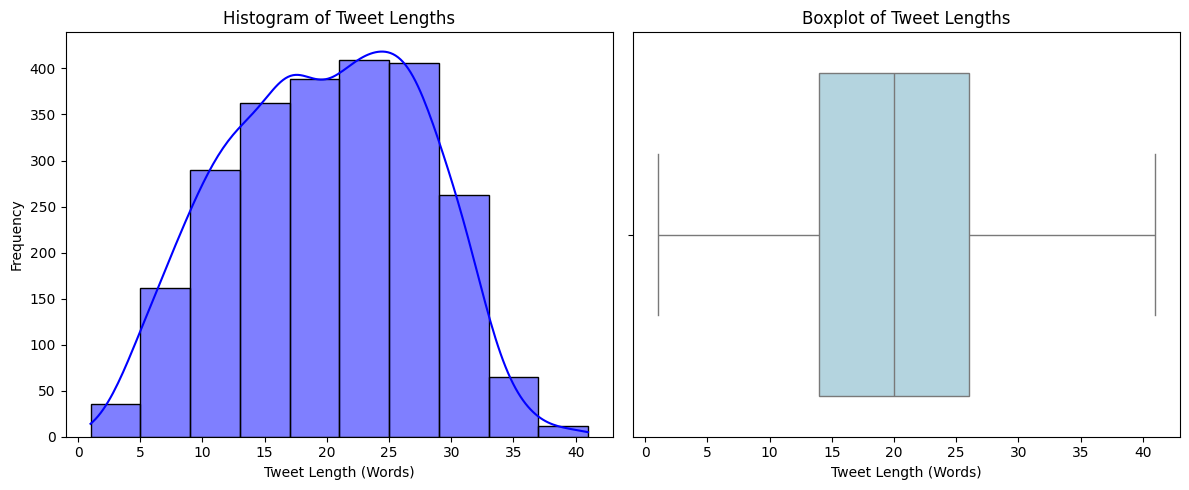

,TweetLength
count,2394.000000
mean,19.743943
std,7.701440
min,1.000000
25%,14.000000
50%,20.000000
75%,26.000000
max,41.000000


In [9]:
train_dataset["TweetLength"] = train_dataset["Sentence"].apply(lambda x: len(x))

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_dataset["TweetLength"], bins=10, kde=True, color="blue")
plt.xlabel("Tweet Length (Words)")
plt.ylabel("Frequency")
plt.title("Histogram of Tweet Lengths")

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(x=train_dataset["TweetLength"], color="lightblue")
plt.xlabel("Tweet Length (Words)")
plt.title("Boxplot of Tweet Lengths")

plt.tight_layout()
plt.show()

display(train_dataset["TweetLength"].describe())

##### can truncate the tweet lengths to 35

In [10]:
MAX_LEN=35

In [11]:
sentences=train_df.SentenceID.nunique()

agg_df=pd.DataFrame()
for label in train_df.Label.unique():
    if label=='O':
        continue
    d=train_df.loc[train_df.Label==label].copy()
    percent_sent_mentioned_in=100*d.SentenceID.nunique()/sentences
    percent_words_described_as=100*len(d)/len(train_df)

    m=pd.DataFrame([[label,percent_sent_mentioned_in,percent_words_described_as]],columns=['Named_Entity'
                                                                                         ,'percent_sentences_mentioned_in'
                                                                                        ,'percent_words_described_as'])
    agg_df=pd.concat([agg_df,m],axis=0,ignore_index=True)
    # Extract Named Entities
    named_entities = list(d.Sentence.values)

    # Generate WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(named_entities))

    # Plot WordCloud
    print('\n\n')
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("WordCloud of Named Entity: {}".format(label))
    plt.show()




Output hidden; open in https://colab.research.google.com to view.

In [12]:
display(agg_df.sort_values('percent_sentences_mentioned_in',ascending=False).reset_index(drop=True))

,Named_Entity,percent_sentences_mentioned_in,percent_words_described_as
0,B-person,14.411028,0.949923
1,B-geo-loc,8.897243,0.583917
2,B-other,8.061821,0.478135
3,I-person,6.934002,0.454863
4,B-company,6.307435,0.361775
5,I-other,5.847953,0.679121
6,B-facility,3.926483,0.220027
7,I-facility,3.091061,0.222142
8,B-product,3.049290,0.205217
9,B-musicartist,1.796157,0.116360


## Questions & Answers

### **1. Defining the Problem Statement and Use Cases**  
The task is **Named Entity Recognition (NER) for Twitter data**, identifying entities like persons, locations, and companies.  
**Use Cases:**  
- **Social Media Monitoring** (trend analysis, sentiment tracking)  
- **Customer Support** (auto-tagging complaints, product mentions)  
- **News & Content Categorization**  
- **Voice Assistants & Chatbots**  

---

### **2. Data Format (CoNLL BIO Format)**  
CoNLL uses **BIO tagging**:  
- **B-** (Beginning of an entity)  
- **I-** (Inside an entity)  
- **O** (Outside any entity)  

---

### **3. Other NER Annotation Formats**  
- **IOB (Inside-Outside-Beginning)** – Same as BIO.  
- **IOB2** – Requires every entity to have **B-** even if it starts immediately.  
- **BILOU (Beginning, Inside, Last, Outside, Unit)** – More granular than BIO.  
- **JSON/XML** – Structured annotation formats used in APIs.  

---

### **4. Why Tokenization is Needed**  
- Splits text into **meaningful units (tokens)**.  
- Ensures model aligns words with **correct NER labels**.  
- Handles **subword-level entities** in transformer models (e.g., BERT).  

---

### **5. Other Models for NER**  
- **BiLSTM-CRF (using this below)** – Strong baseline, context-aware.  
- **BERT-based NER (using this below) (e.g., RoBERTa, DistilBERT)** – Contextualized embeddings.  
- **SpaCy & Flair** – Pre-trained, rule-based hybrid models.  
- **T5/XLM-R** – Advanced multilingual models.  

---

### **6. Impact of Early Stopping**  
- Prevents **overfitting**.  
- Helps maintain **generalization** by stopping at optimal performance.  
- If set too aggressively, it may stop **before full convergence**.  

---

### **7. How BERT Processes Sentence Pairs**  
- Concatenates with **[SEP]** token.  
- Adds **[CLS]** token at the start for classification.  
- Uses **segment embeddings** to differentiate sentences.
- [CLS] Sentence A [SEP] Sentence B [SEP]

---

### **8. Why Choose Attention-Based Models Over RNNs?**  
- **Parallelization** – Faster than sequential RNNs.  
- **Long-range dependencies** – Captures context better.  
- **Efficient training** – Uses **self-attention** instead of recurrent loops.  

---

### **9. Difference Between BERT and Simple Transformers**  
| Feature        | BERT (Encoder-Only)  | Simple Transformers (Encoder-Decoder) |
|---------------|---------------------|--------------------------------------|
| **Architecture** | Transformer Encoder | Transformer Encoder + Decoder |
| **Objective** | Masked Language Modeling (MLM), Next Sentence Prediction (NSP) | Sequence-to-Sequence tasks (e.g., text generation, translation) |
| **Input Handling** | Processes input tokens with self-attention | Encodes input and generates output sequentially |
| **Best For** | NER, Classification, Sentiment Analysis | Summarization, Translation, Text Generation |
| **Context Handling** | Bi-directional (uses full sentence context) | Auto-regressive (generates words step by step) |

**Key Difference:**  
- **BERT is purely an encoder model** used for understanding text.  
- **Simple Transformers (if using encoder-decoder architecture) can handle both understanding & generation tasks.**  

---

## **Insights from the Dataset**  

### **1. Class Imbalance in Named Entity Labels**  
The dataset exhibits severe class imbalance, which can negatively impact model performance. The vast majority of tokens are labeled as **"O" (outside any named entity)**, making up **~93% of the dataset** (44,803 out of 48,298 total labels).  

| Label        | Count | Percentage (%) |
|-------------|--------|---------------|
| O           | 44,803 | 92.76%        |
| B-person    | 449    | 0.93%         |
| I-other     | 321    | 0.66%         |
| B-geo-loc   | 276    | 0.57%         |
| B-other     | 226    | 0.47%         |
| ...         | ...    | ...           |

- The **top 3 entity types** (excluding "O") are **B-person (0.93%)**, **B-geo-loc (0.57%)**, and **B-other (0.47%)**.
- Some labels have **very few occurrences**, such as **I-sportsteam (0.048%)**, making them difficult for a model to learn effectively.

### **2. Small Dataset Size**  
- The dataset contains **only 2,394 sentences (test set have 3850 sentences)**, with an **average sentence length of 19.74 words**.
- The **shortest tweet has just 1 word**, while the **longest has 41 words**.
- A larger dataset would be necessary for a model to generalize well, especially for low-frequency entities.

### **3. Named Entity Distribution in Sentences**  
| Named Entity | % of Sentences Containing It | % of Words Assigned to It |
|-------------|-----------------------------|--------------------------|
| B-person    | 14.41%                        | 0.95%                    |
| B-geo-loc   | 8.90%                         | 0.58%                    |
| B-other     | 8.06%                         | 0.48%                    |
| I-person    | 6.93%                         | 0.45%                    |
| B-company   | 6.31%                         | 0.36%                    |
| I-other     | 5.85%                         | 0.68%                    |
| B-facility  | 3.93%                         | 0.22%                    |

- **B-person appears in the most sentences (14.41%)** but still accounts for less than **1% of total words**.
- **Rare entities (I-sportsteam, I-tvshow, I-movie)** have an extremely low presence, making classification difficult.

## **Recommendations**  

### **1. Address Class Imbalance**  
- Use **data augmentation** techniques (e.g., synonym replacement, back-translation) to artificially increase the size of underrepresented categories.
- I Applied **weighted loss functions** or **focal loss** to give more importance to underrepresented labels.
- Consider using **sampling techniques**:
  - **Oversampling** for minority classes.
  - **Undersampling** for the "O" class to prevent the model from learning a bias towards non-entities.

### **2. Expand the Dataset**  
- The current dataset is too small for robust deep learning models. Consider:
  - Collecting more labeled Twitter data.
  - Using **pre-trained NER models** (e.g., spaCy, BERT-based NER) for weak supervision on unlabeled data.

### **3. Model Considerations**  
- **Created Baseline Model**: A **BiLSTM-CRF** model is a good starting point but might struggle with rare entities.
- **Also Created an Advanced Model**: Use a **pre-trained transformer-based NER model (e.g., BERT, RoBERTa, T5)** to leverage contextual word representations.
- **Next step: Hybrid Approach**: Combine **rule-based methods** (e.g., regex for common names) with deep learning to improve rare class recognition.

### **4. Improve Label Consistency**  
- Consider **merging low-frequency labels** (e.g., B-movie, B-tvshow, B-musicartist → B-entertainment) to create more balanced classes.
- Standardize label definitions to avoid **over-segmentation of entities**.
- Here, I have merged all entities into one category 'E'

### **5. Use Data Preprocessing for Better Recognition**  
- **Lowercasing & spell correction was done** (e.g., `wordninja`, `pyspellchecker`) to fix user typos.
- **Hashtag and emoji expansion can also be done** to preserve meaningful entities.

By implementing these recommendations, the NER model can achieve better generalization and performance despite dataset limitations.

#### Building CustomTokenizer and BertTokenizer

In [13]:
# Example dataset: List of (sentence, label)
dataset = list(train_dataset[['Sentence','Label_modified']].values)

# Custom Tokenizer
custom_tokenizer = CustomTokenizer()
custom_sentences, custom_labels = custom_tokenizer.fit(dataset)
word2vec_embeddings = custom_tokenizer.get_embeddings()

# BERT Tokenizer
bert_tokenizer = BertNERTokenizer()
bert_sentences, bert_labels = bert_tokenizer.fit(dataset)
bert_embeddings = bert_tokenizer.get_embeddings()


Loading pre-trained Word2Vec embeddings...
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Word2Vec loaded!


Cleaned Train Text: 100%|██████████| 2394/2394 [11:05<00:00,  3.60it/s]


Creating embedding matrix...
Embedding hits: 5478, misses: 1319
Embeddings loaded and memory freed.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Cleaned Train Text: 100%|██████████| 2394/2394 [00:03<00:00, 792.69it/s] 


In [14]:
pd.DataFrame(zip(custom_sentences,custom_labels),columns=['Sentence','Label']).head()

,Sentence,Label
0,"[<MENTION>, <MENTION>, they, will, be, all, done, by, sunday, trust, me, wink]","[O, O, O, O, O, O, O, O, O, O, O, O]"
1,"[made, it, back, home, to, ga, ., it, sucks, not, to, be, at, disney, world, ,, but, its, good, to, be, home, ., time, to, start, planning, the, next, disney, world, trip, .]","[O, O, O, O, O, E, O, O, O, O, O, O, O, E, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E, E, O, O]"
2,"[', breaking, dawn, ', returns, to, vancouver, on, january, with, <URL>]","[O, E, E, O, O, O, E, O, O, O, O]"
3,"[<MENTION>, perhaps, ,, but, folks, may, find, something, in, the, gallery, that, is, helpful, in, their, day-to-day, work, as, well, ., even, just, to, use, it, .]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,"[<MENTION>, aye, been, tonight, -, excellent]","[O, O, O, O, O, O]"


In [15]:
pd.DataFrame(zip(bert_sentences,bert_labels),columns=['Sentence','Label']).head()

,Sentence,Label
0,"[@, sam, ##mie, ##lynn, ##smo, ##m, @, t, ##g, ##10, ##7, ##8, ##1, they, will, be, all, done, by, sunday, trust, me, *, wink, *]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1,"[made, it, back, home, to, ga, ., it, sucks, not, to, be, at, disney, world, ,, but, its, good, to, be, home, ., time, to, start, planning, the, next, disney, world, trip, .]","[O, O, O, O, O, E, O, O, O, O, O, O, O, E, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E, E, O, O]"
2,"[', breaking, dawn, ', returns, to, vancouver, on, january, 11th, http, :, /, /, bit, ., l, ##y, /, db, ##dm, ##s, ##8]","[O, E, E, O, O, O, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
3,"[@, l, ##s, _, n, perhaps, ,, but, folks, may, find, something, in, the, gallery, that, is, helpful, in, their, day, -, to, -, day, work, as, well, ., even, just, to, use, it, .]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
4,"[@, carr, ##0, ##t, aye, been, tonight, -, excellent]","[O, O, O, O, O, O, O, O, O]"


#### Preprocess dataset

In [16]:


class TokenizedDatasetProcessor:
    def __init__(self, word2idx, label2idx, maxlen=30):
        self.word2idx = word2idx
        self.label2idx = label2idx
        self.maxlen = maxlen
        self.n_tags = len(label2idx)

    def process(self, dataset):
        """
        Processes dataset to generate token_ids, label_ids, segment_ids, attention_mask, and categorical_labels.
        """
        token_ids = [[self.word2idx.get(w, self.word2idx["<PAD>"]) for w in s] for s in dataset["Sentence"]]
        label_ids = [[self.label2idx.get(l, self.label2idx["<PAD>"]) for l in s] for s in dataset["Label"]]

        # Padding
        token_ids = pad_sequences(maxlen=self.maxlen, sequences=token_ids, padding="post", value=self.word2idx["<PAD>"])
        label_ids = pad_sequences(maxlen=self.maxlen, sequences=label_ids, padding="post", value=self.label2idx["<PAD>"])

        # Generate segment_ids (all 0s) and attention_mask (1 for tokens, 0 for pad)
        segment_ids = np.zeros_like(token_ids)
        attention_mask = (token_ids != self.word2idx["<PAD>"]).astype(int)

        # One-hot encode labels
        categorical_labels = np.array([to_categorical(i, num_classes=self.n_tags) for i in label_ids])

        dataset["token_id"] = list(token_ids)
        dataset["label_id"] = list(label_ids)
        dataset["segment_id"] = list(segment_ids)
        dataset["attention_mask"] = list(attention_mask)
        dataset["categorical_labels"] = list(categorical_labels)

        return dataset





# Tokenized Dataset Processor
custom_processor = TokenizedDatasetProcessor(custom_tokenizer.word2idx, custom_tokenizer.label2idx, MAX_LEN)
custom_train_dataset = custom_processor.process(pd.DataFrame(zip(custom_sentences,custom_labels),columns=['Sentence','Label']))


bert_processor = TokenizedDatasetProcessor(bert_tokenizer.word2idx, bert_tokenizer.label2idx, MAX_LEN)
bert_train_dataset = bert_processor.process(pd.DataFrame(zip(bert_sentences,bert_labels),columns=['Sentence','Label']))


In [17]:
bert_train_dataset.head()

,Sentence,Label,token_id,label_id,segment_id,attention_mask,categorical_labels
0,"[@, sam, ##mie, ##lynn, ##smo, ##m, @, t, ##g, ##10, ##7, ##8, ##1, they, will, be, all, done, by, sunday, trust, me, *, wink, *]","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[902, 1599, 6213, 1691, 4031, 3295, 902, 2, 1480, 5508, 6484, 2775, 5812, 275, 1186, 4106, 3237, 2522, 247, 7228, 5767, 6151, 3832, 3278, 3832, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]"
1,"[made, it, back, home, to, ga, ., it, sucks, not, to, be, at, disney, world, ,, but, its, good, to, be, home, ., time, to, start, planning, the, next, disney, world, trip, .]","[O, O, O, O, O, E, O, O, O, O, O, O, O, E, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, E, E, O, O]","[3382, 1062, 6655, 1613, 3942, 5210, 4537, 1062, 5043, 1314, 3942, 4106, 4324, 2114, 5818, 2900, 6860, 1280, 4639, 3942, 4106, 1613, 4537, 1107, 3942, 2133, 799, 239, 4648, 2114, 5818, 6820, 4537, 0, 0]","[1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]","[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0]]"
2,"[', breaking, dawn, ', returns, to, vancouver, on, january, 11th, http, :, /, /, bit, ., l, ##y, /, db, ##dm, ##s, ##8]","[O, E, E, O, O, O, E, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]","[2076, 299, 7025, 2076, 6603, 3942, 869, 2857, 846, 1937, 612, 3830, 4001, 4001, 5496, 4537, 2803, 6600, 4001, 926, 2331, 7036, 2775, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0], [1.0, 0.0, 0.0],

In [18]:


def custom_train_test_split(bert_train_dataset):
    train_df, valid_df = train_test_split(bert_train_dataset, test_size=0.2, random_state=100)
    train_df, valid_df = train_df.reset_index(drop=True), valid_df.reset_index(drop=True)

    print(train_df.shape, valid_df.shape)

    train_token_id = np.array(train_df.token_id.tolist())
    train_segment_id = np.array(train_df.segment_id.tolist())
    train_attention_mask = np.array(train_df.attention_mask.tolist())
    train_label = np.array(train_df.label_id.tolist())
    train_cat_label=np.array(train_df.categorical_labels.tolist())

    valid_token_id = np.array(valid_df.token_id.tolist())
    valid_segment_id = np.array(valid_df.segment_id.tolist())
    valid_attention_mask = np.array(valid_df.attention_mask.tolist())
    valid_label = np.array(valid_df.label_id.tolist())
    valid_cat_label=np.array(valid_df.categorical_labels.tolist())

    print(train_token_id.shape, train_segment_id.shape, train_attention_mask.shape ,train_label.shape)
    print(valid_token_id.shape, valid_segment_id.shape, valid_attention_mask.shape ,valid_label.shape)

    return train_token_id, train_segment_id, train_attention_mask, train_label, train_cat_label, valid_token_id, valid_segment_id, valid_attention_mask, valid_label, valid_cat_label



custom_train_token_id, custom_train_segment_id, custom_train_attention_mask, custom_train_label, custom_train_cat_label, custom_valid_token_id, custom_valid_segment_id, custom_valid_attention_mask, custom_valid_label, custom_valid_cat_label=custom_train_test_split(custom_train_dataset)
bert_train_token_id, bert_train_segment_id, bert_train_attention_mask, bert_train_label, bert_train_cat_label, bert_valid_token_id, bert_valid_segment_id, bert_valid_attention_mask, bert_valid_label, bert_valid_cat_label=custom_train_test_split(bert_train_dataset)


(1915, 7) (479, 7)
(1915, 35) (1915, 35) (1915, 35) (1915, 35)
(479, 35) (479, 35) (479, 35) (479, 35)
(1915, 7) (479, 7)
(1915, 35) (1915, 35) (1915, 35) (1915, 35)
(479, 35) (479, 35) (479, 35) (479, 35)


In [19]:
coll='Label_modified'

cw=(1/train_df[coll].value_counts(normalize=True)).reset_index()
class_weights = np.ones(len(custom_tokenizer.label2idx))  # Start with equal weights
class_weights[custom_tokenizer.label2idx["O"]] = 1  # Lower weight for "O"
for tag, idx in custom_tokenizer.label2idx.items():
    if tag not in ("O","<PAD>"):
      class_weights[idx] = cw.loc[cw[coll]==tag].proportion.values[0]  # Increase weight for rare entities

class_weights=list(np.log1p(class_weights)) # logarithmic scaling to compress extreme values # log(1 + weight) to avoid log(0)
class_weights

[0.6931471805599453, 0.6931471805599453, 3.0048424354395653]

In [20]:

joblib.dump({'word2idx':custom_tokenizer.word2idx
             ,'idx2word':custom_tokenizer.idx2word
             ,'label2idx':custom_tokenizer.label2idx
             ,'idx2label':custom_tokenizer.idx2label
             ,'class_weights':class_weights},"custom_tokenizer.pkl")
joblib.dump({'word2idx':bert_tokenizer.word2idx
             ,'idx2word':bert_tokenizer.idx2word
             ,'label2idx':bert_tokenizer.label2idx
             ,'idx2label':bert_tokenizer.idx2label
             ,'class_weights':class_weights},"bert_tokenizer.pkl")

#load it later
#ct=joblib.load("custom_tokenizer.pkl")
#bt=joblib.load("bert_tokenizer.pkl")

['bert_tokenizer.pkl']

In [21]:

# Hyperparams if GPU is available
# if tf.test.is_gpu_available():
#     print('GPU available')
#     BATCH_SIZE = 512  # Number of examples used in each iteration
#     EPOCHS = 30  # Number of passes through entire dataset
#     MAX_LEN =30  # Max length of review (in words)
#     EMBEDDING = 200  # Dimension of word embedding vector
# # Hyperparams for CPU training
# else:
#     print('GPU not available')
#     BATCH_SIZE = 32
#     EPOCHS = 30
#     MAX_LEN = 30
#     EMBEDDING = 200

In [22]:
print('Custom vocab size: {}'.format(len(custom_tokenizer.word2idx)))
print('Bert vocab size: {}'.format(len(bert_tokenizer.word2idx)))


Custom vocab size: 6797
Bert vocab size: 7255


In [23]:
# word2vec embeddings obtained from custom tokenizer
word2vec_embeddings.shape

(6797, 200)

#### BUILD and COMPILE LSTM+CRF Model

In [28]:
def calculate_ndcg_score(y_true, y_pred_prob, k=3):
    batch_size, seq_len, num_classes = y_true.shape  # (None, 30, 22)
    ndcg_scores = []

    for i in range(batch_size):  # Iterate over each sentence
        sentence_ndcg = []

        for j in range(seq_len):  # Iterate over each word in the sentence
            true_label_idx = np.argmax(y_true[i, j])  # Convert one-hot to index

            # Get predicted probabilities for this word (size: 22)
            pred_probs = y_pred_prob[i, j]

            # Sort entity indices by predicted probability (highest first)
            sorted_indices = np.argsort(pred_probs)[::-1]

            # Relevance scores: 1 if true class is in the top k, else 0
            relevance_scores = (sorted_indices[:k] == true_label_idx).astype(int)

            # Compute DCG (Discounted Cumulative Gain)
            dcg = sum(rel / np.log2(rank + 2) for rank, rel in enumerate(relevance_scores))

            # Compute IDCG (Ideal DCG)
            idcg = 1 / np.log2(2)  # The best possible DCG if true label is ranked 1st

            # Compute NDCG (Normalized DCG)
            ndcg = dcg / idcg if idcg > 0 else 0
            sentence_ndcg.append(ndcg)

        ndcg_scores.append(np.mean(sentence_ndcg))  # Average over words in the sentence

    return np.mean(ndcg_scores)  # Final average over all sentences

In [29]:


tf.keras.backend.set_floatx('float32')  # Ensure float32 precision

class SigmoidFocalCrossEntropyLoss(tf.keras.losses.Loss):
    def __init__(self, label2idx, gamma=3.0, alpha=None, reduction=tf.keras.losses.Reduction.AUTO, name="sigmoid_focal_crossentropy"):
        super(SigmoidFocalCrossEntropyLoss, self).__init__(name=name, reduction=reduction)
        self.gamma = gamma
        self.pad_index = 0  # Index of <PAD> token
        self.label2idx = label2idx

        # Ensure alpha is properly initialized
        if alpha is None:
            self.alpha = tf.ones((len(label2idx),), dtype=tf.float32)  # Default to equal class weights
        else:
            self.alpha = tf.convert_to_tensor(alpha, dtype=tf.float32)

    def call(self, y_true, y_pred):
        """
        y_true: One-hot encoded labels (batch_size, seq_len, num_classes)
        y_pred: Raw logits (batch_size, seq_len, num_classes)
        """
        y_true = tf.cast(y_true, tf.float32)
        y_pred = tf.cast(y_pred, tf.float32)  # Ensure float dtype
        y_true_labels = tf.argmax(y_true, axis=-1) # (batch_size, seq_len)

        # Identify <PAD> tokens in y_true (Assumes one-hot encoding)
        mask = tf.logical_and(y_true_labels != self.label2idx["<PAD>"], y_true_labels != self.label2idx["<PAD>"])
        mask_expanded = tf.expand_dims(mask, axis=-1)  # (batch_size, seq_len, 1)  # Mask out <PAD>

        # Ensure shape compatibility
        if y_true.shape[-1] != y_pred.shape[-1]:
            raise ValueError(f"Shape mismatch: y_true {y_true.shape} vs y_pred {y_pred.shape}")

        # Apply sigmoid to logits
        y_pred = tf.nn.sigmoid(y_pred)

        # Compute categorical cross-entropy instead of binary cross-entropy
        cce =-y_true * tf.math.log(y_pred+1e-8)

        # Compute focal factor
        p_t = y_true * y_pred + (1 - y_true) * (1 - y_pred)  # p_t = p if y=1 else 1-p
        focal_factor = tf.pow((1 - p_t),self.gamma)

        # Apply alpha balancing
        alpha_neg=0.1
        alpha_weight = self.alpha * y_true+ alpha_neg*(1-y_true)

        # Compute final focal loss
        focal_loss = alpha_weight * focal_factor * cce

        masked_loss = focal_loss * tf.cast(mask_expanded, tf.float32)

        #print(focal_loss.shape,masked_loss.shape)


        return tf.reduce_sum(masked_loss) / (tf.reduce_sum(tf.cast(mask_expanded, tf.float32)) + 1e-8)




# Custom NDCG@3 metric
class NDCGMetric(tf.keras.metrics.Metric):
    def __init__(self, k=3, name="ndcg_at_3", **kwargs):
        super(NDCGMetric, self).__init__(name=name, **kwargs)
        self.k = k
        self.ndcg_sum = self.add_weight(name="ndcg_sum", initializer="zeros")
        self.count = self.add_weight(name="count", initializer="zeros")
        self.pad_index = 0  # Index of <PAD> token

    def update_state(self, y_true, y_pred, sample_weight=None):
        # Convert from TensorFlow tensors to NumPy arrays

        #y_true_np = tf.argmax(y_true, axis=-1)  # Convert one-hot to label indices
        y_pred = tf.nn.softmax(y_pred, axis=-1)  # Convert logits to probabilities

        # Debug: Print shape before masking
        # tf.print("y_true shape:", tf.shape(y_true))
        # tf.print("y_pred shape:", tf.shape(y_pred))

        # Identify <PAD> tokens in y_true (Assumes one-hot encoding)
        mask = tf.reduce_max(y_true, axis=-1) > 0  # Mask out <PAD> (index 0 is one-hot all zeros)

        # Debug: Print shape after masking
        # tf.print("Mask shape:", tf.shape(mask))

        # Compute NDCG score ignoring <PAD> tokens
        def compute_ndcg(y_true_np, y_pred_np, mask_np):
            # Convert tensors to NumPy
            y_true_np = y_true_np.numpy() if isinstance(y_true_np, tf.Tensor) else y_true_np
            y_pred_np = y_pred_np.numpy() if isinstance(y_pred_np, tf.Tensor) else y_pred_np
            mask_np = mask_np.numpy() if isinstance(mask_np, tf.Tensor) else mask_np

            shape_s=y_true_np.shape

            # Debugging: Check actual received shape
            # print("Inside compute_ndcg - y_true_np shape:", y_true_np.shape)
            # print("Inside compute_ndcg - y_pred_np shape:", y_pred_np.shape)
            # print("Inside compute_ndcg - mask_np shape:", mask_np.shape)

            mask_np=np.repeat(np.expand_dims(mask_np,axis=-1),y_true_np.shape[-1],axis=-1)

            y_true_np = y_true_np[mask_np].reshape(shape_s)
            y_pred_np = y_pred_np[mask_np].reshape(shape_s)
            if y_true_np.ndim != 3 or y_pred_np.ndim != 3:
                print("Error: Expected 3D inputs after masking, got:", y_true_np.shape, y_pred_np.shape)
                return 0.0

            return calculate_ndcg_score(y_true_np, y_pred_np, k=self.k) if y_true_np.size > 0 else 0.0

        # Apply the function using tf.py_function
        ndcg_value = tf.py_function(compute_ndcg, [y_true, y_pred, mask], tf.float32)

        # Update accumulated metric
        self.ndcg_sum.assign_add(ndcg_value)
        self.count.assign_add(1.0)

    def result(self):
        return self.ndcg_sum / self.count  # Compute final average NDCG

    def reset_state(self):
        self.ndcg_sum.assign(0.0)
        self.count.assign(0.0)


class MaskedAccuracy(tf.keras.metrics.Metric):
    def __init__(self, label2idx,name="accuracy", **kwargs):
        super(MaskedAccuracy, self).__init__(name=name, **kwargs)
        self.correct = self.add_weight(name="correct", initializer="zeros", dtype=tf.float32)
        self.total = self.add_weight(name="total", initializer="zeros", dtype=tf.float32)
        self.label2idx=label2idx

    def update_state(self, y_true, y_pred, sample_weight=None):
        """
        y_true: One-hot encoded true labels (batch_size, seq_len, num_classes)
        y_pred: Raw logits (batch_size, seq_len, num_classes)
        """
        # Convert one-hot labels to indices
        y_true_indices = tf.argmax(y_true, axis=-1)  # (batch_size, seq_len)
        y_pred_indices = tf.argmax(y_pred, axis=-1)  # (batch_size, seq_len)

        # Mask for non-PAD tokens
        mask = tf.cast(tf.not_equal(y_true_indices, self.label2idx["<PAD>"]), dtype=tf.float32)

        # Compute element-wise accuracy
        matches = tf.cast(tf.equal(y_true_indices, y_pred_indices), dtype=tf.float32)

        # Apply the mask
        masked_matches = matches * mask
        masked_total = mask

        # Update accumulators
        self.correct.assign_add(tf.reduce_sum(masked_matches))
        self.total.assign_add(tf.reduce_sum(masked_total))

    def result(self):
        return self.correct / (self.total + tf.keras.backend.epsilon())  # Avoid division by zero

    def reset_state(self):
        self.correct.assign(0.0)
        self.total.assign(0.0)

def build_model(word2vec_embeddings,max_len, input_dim,label2idx,class_weights, embedding_dim):
    input_layer = Input(shape=(max_len,))

    embeddings = Embedding(input_dim=input_dim,
                           output_dim=embedding_dim,
                           embeddings_initializer=Constant(word2vec_embeddings),  # Load pre-trained embeddings
                           input_length=max_len,
                           mask_zero=True)(input_layer)

    lstm_output = Bidirectional(LSTM(units=50, return_sequences=True))(embeddings)
    #lstm_output = Bidirectional(LSTM(units=50, return_sequences=True))(lstm_output)

    dense_out = TimeDistributed(Dense(25, activation="relu"))(lstm_output)

    crf = CRF(len(label2idx), name="crf")
    predicted_sequence, potentials, sequence_length, crf_kernel = crf(dense_out)

    def crf_loss_fn(y_true, y_pred):
      sequence_length = tf.reduce_sum(tf.cast(tf.math.not_equal(y_true, 0), tf.int32), axis=1)

      # Use log-likelihood instead of viterbi decoding
      log_likelihood, _ = crf.log_likelihood(y_pred, y_true, sequence_length)

      return -log_likelihood  # Negative log-likelihood loss


    model = Model(input_layer, outputs={"potentials": potentials}) #, "predicted_sequence":predicted_sequence
    model.compile(
        optimizer=AdamW(weight_decay=0.001),
        loss={"potentials": SigmoidFocalCrossEntropyLoss(label2idx=label2idx, gamma=3.0, alpha=class_weights)},  # Custom Focal Loss , "predicted_sequence": crf_loss_fn
        metrics={"potentials":[MaskedAccuracy(label2idx=label2idx),NDCGMetric(k=3)]}
    )

    return model

model = build_model(word2vec_embeddings,max_len=MAX_LEN, input_dim=len(custom_tokenizer.word2idx),label2idx=custom_tokenizer.label2idx,class_weights=class_weights, embedding_dim=200)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 35)]              0         
                                                                 
 embedding (Embedding)       (None, 35, 200)           1359400   
                                                                 
 bidirectional (Bidirection  (None, 35, 100)           100400    
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 35, 25)            2525      
 ributed)                                                        
                                                                 
 crf (CRF)                   [(None, 35),              93        
                              (None, 35, 3),                     
                              (None,),                     

#### BUILD and COMPILE BERT Model

In [24]:



from keras.saving import register_keras_serializable

@register_keras_serializable()
class TFBertLayer(Layer):
    def __init__(self, model_name, num_labels, **kwargs):
        super(TFBertLayer, self).__init__(**kwargs)
        self.model_name = model_name
        self.num_labels = num_labels
        self.bert = TFBertForTokenClassification.from_pretrained(
            model_name, num_labels=num_labels
        )

    def call(self, inputs):
        input_ids, attention_mask, token_type_ids = inputs
        outputs = self.bert(
            input_ids=input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        return outputs.logits  # Extract logits


    def get_config(self):
        config = super().get_config()
        config.update({
            "model_name": self.model_name,
            "num_labels": self.num_labels
        })
        return config


    @classmethod
    def from_config(cls, config):
        return cls(**config)


def build_bert_model(max_len, tags_2_idx):


    # Define model inputs
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    token_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="token_type_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")


    # Use custom wrapper layer
    bert_output = TFBertLayer("bert-base-uncased", num_labels=len(tags_2_idx))([input_ids, attention_mask, token_type_ids])


    # Define final model
    model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs={"potentials": bert_output})


    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)


    # Compile model
    model.compile(optimizer=Adam(learning_rate=3e-5), loss={"potentials": loss}, metrics={"potentials": ['accuracy']})


    return model

## output is raw logits -- need to convert them to softmax

In [25]:
bert_model = build_bert_model(max_len=MAX_LEN, tags_2_idx=bert_tokenizer.label2idx)
bert_model.summary()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 35)]                 0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 35)]                 0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 35)]                 0         []                            
 )                                                                                                
                                                                                              

#### Training LSTM+CRF Model

In [30]:
dir_paths=[f"./logs",f"./twitter_ner_crf_best_model"]
for dir_path in dir_paths:
  if os.path.exists(dir_path):
      shutil.rmtree(dir_path)  # Deletes the entire directory and its contents
      print(f"Deleted: {dir_path}")
  else:
      print(f"Directory does not exist: {dir_path}")

# Custom callback to log metrics
class LogMetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1} - Accuracy: {logs.get('accuracy'):.4f}, "
              f"Val Accuracy: {logs.get('val_accuracy'):.4f}, "
              f"NDCG@3: {logs.get('ndcg_at_3'):.4f}, "
              f"Val NDCG@3: {logs.get('val_ndcg_at_3'):.4f}")

# Directory for TensorBoard logs
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

callbacks = [
    EarlyStopping(monitor="val_loss", min_delta=0, patience=15, restore_best_weights=True),
    ModelCheckpoint(filepath="./twitter_ner_crf_best_model/best_model_weights.h5",
                    save_best_only=True, save_weights_only=True, monitor="val_loss", mode="min"),
    ReduceLROnPlateau(monitor="val_loss",min_delta=0.0001, factor=0.1, patience=3, min_lr=1e-6),
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    LogMetricsCallback()
]

history = model.fit(
    custom_train_token_id, custom_train_cat_label,
    validation_data=(custom_valid_token_id, custom_valid_cat_label),
    epochs=20,
    batch_size=32,
    callbacks=callbacks
)

Deleted: ./logs
Deleted: ./twitter_ner_crf_best_model
Epoch 1/20


60/60 [==============================] - 14s 122ms/step - loss: 0.0076 - accuracy: 0.9187 - ndcg_at_3: 0.7749 - val_loss: 3.6436e-05 - val_accuracy: 0.9355 - val_ndcg_at_3: 0.7792 - lr: 0.0010
Epoch 2/20
60/60 [==============================] - 8s 135ms/step - loss: 3.0615e-05 - accuracy: 0.9515 - ndcg_at_3: 0.7816 - val_loss: 6.1308e-05 - val_accuracy: 0.9355 - val_ndcg_at_3: 0.7792 - lr: 0.0010
Epoch 3/20
60/60 [==============================] - 6s 105ms/step - loss: 4.5500e-05 - accuracy: 0.9515 - ndcg_at_3: 0.7818 - val_loss: 7.6525e-05 - val_accuracy: 0.9355 - val_ndcg_at_3: 0.7792 - lr: 0.0010
Epoch 4/20
60/60 [==============================] - 8s 141ms/step - loss: 4.5639e-05 - accuracy: 0.9515 - ndcg_at_3: 0.7817 - val_loss: 7.7213e-05 - val_accuracy: 0.9355 - val_ndcg_at_3: 0.7792 - lr: 0.0010
Epoch 5/20
60/60 [==============================] - 6s 103ms/step - loss: 7.6267e-05 - accuracy: 0.9515 - ndcg_at_3: 0.7816 - val_loss: 1.7338e-04 - val_accuracy: 0.9354 - val_ndcg_at_3:

#### Training BERT Model

In [26]:


dir_paths=[f"./bert_logs",f"./twitter_ner_bert_best_model"]
for dir_path in dir_paths:
  if os.path.exists(dir_path):
      shutil.rmtree(dir_path)  # Deletes the entire directory and its contents
      print(f"Deleted: {dir_path}")
  else:
      print(f"Directory does not exist: {dir_path}")


# Custom callback to log metrics
class Bert_LogMetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        logs = logs or {}
        print(f"Epoch {epoch+1} - Accuracy: {logs.get('accuracy'):.4f}, "
              f"Val Accuracy: {logs.get('val_accuracy'):.4f}"
              )

# Directory for TensorBoard logs
log_dir = os.path.join("bert_logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

bert_callbacks = [
    EarlyStopping(monitor="val_loss", patience=8, restore_best_weights=True),
    ModelCheckpoint(filepath="./twitter_ner_bert_best_model/best_model_weights.h5",
                    save_best_only=True, save_weights_only=True, monitor="val_loss", mode="min"),
    ReduceLROnPlateau(monitor="val_loss", factor=0.1, patience=3, min_lr=1e-6),
    TensorBoard(log_dir=log_dir, histogram_freq=1),
    Bert_LogMetricsCallback()
]

bert_history = bert_model.fit(
                    [bert_train_token_id,
                     bert_train_segment_id,
                     bert_train_attention_mask],
                    bert_train_label,
                    epochs=5,
                    validation_data=([bert_valid_token_id,
                                      bert_valid_segment_id,
                                      bert_valid_attention_mask],
                                     bert_valid_label),  #cat_
                    batch_size=32,
                    callbacks=bert_callbacks
)


Deleted: ./bert_logs
Deleted: ./twitter_ner_bert_best_model
Epoch 1/5
60/60 [==============================] - 916s 14s/step - loss: 0.2886 - accuracy: 0.9038 - val_loss: 0.1419 - val_accuracy: 0.9642 - lr: 3.0000e-05
Epoch 2/5
60/60 [==============================] - 864s 14s/step - loss: 0.1365 - accuracy: 0.9647 - val_loss: 0.1334 - val_accuracy: 0.9646 - lr: 3.0000e-05
Epoch 3/5
60/60 [==============================] - 870s 15s/step - loss: 0.1219 - accuracy: 0.9649 - val_loss: 0.1310 - val_accuracy: 0.9646 - lr: 3.0000e-05
Epoch 4/5
60/60 [==============================] - 850s 14s/step - loss: 0.0857 - accuracy: 0.9694 - val_loss: 0.1354 - val_accuracy: 0.9645 - lr: 3.0000e-05
Epoch 5/5
60/60 [==============================] - 847s 14s/step - loss: 0.0567 - accuracy: 0.9778 - val_loss: 0.1596 - val_accuracy: 0.9652 - lr: 3.0000e-05


#### Visualize LSTM+CRF Model Performance

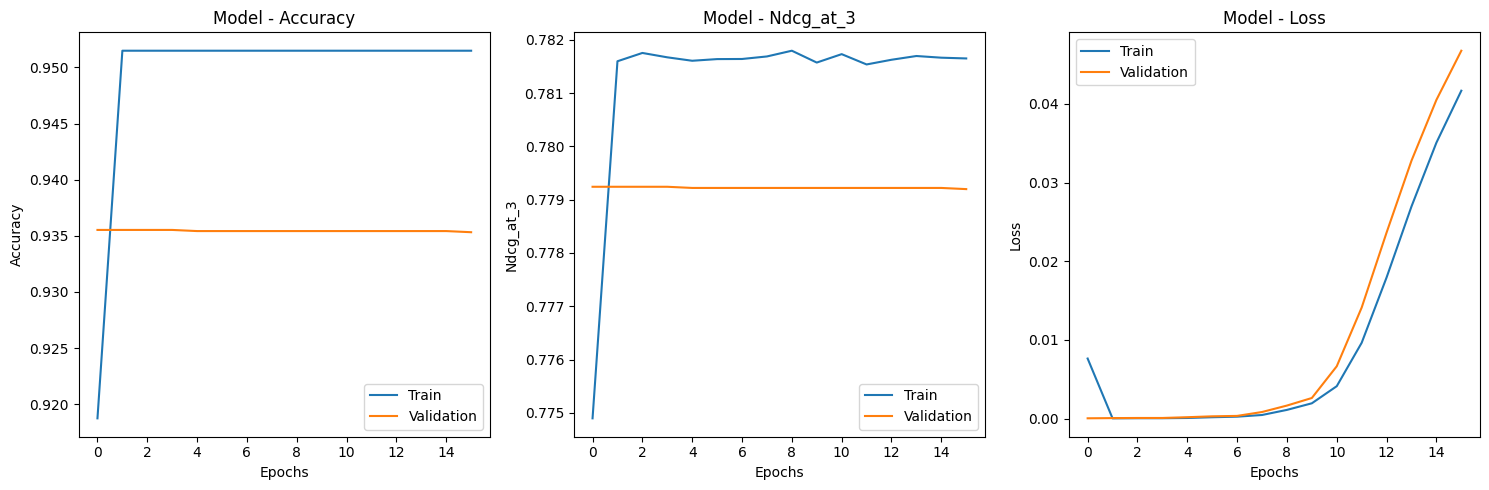

In [31]:
import matplotlib.pyplot as plt

# Extract metrics from history
metrics = ["accuracy", "ndcg_at_3", "loss"]
history_dict = history.history

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # 1 Row × 3 Cols (Metrics)

for col, metric in enumerate(metrics):
    ax = axes[col]

    ax.plot(history_dict[metric], label="Train")
    ax.plot(history_dict[f"val_{metric}"], label="Validation")
    ax.set_title(f"Model - {metric.capitalize()}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.capitalize())
    ax.legend()

plt.tight_layout()
plt.show()

#### Visualize BERT Model Performance

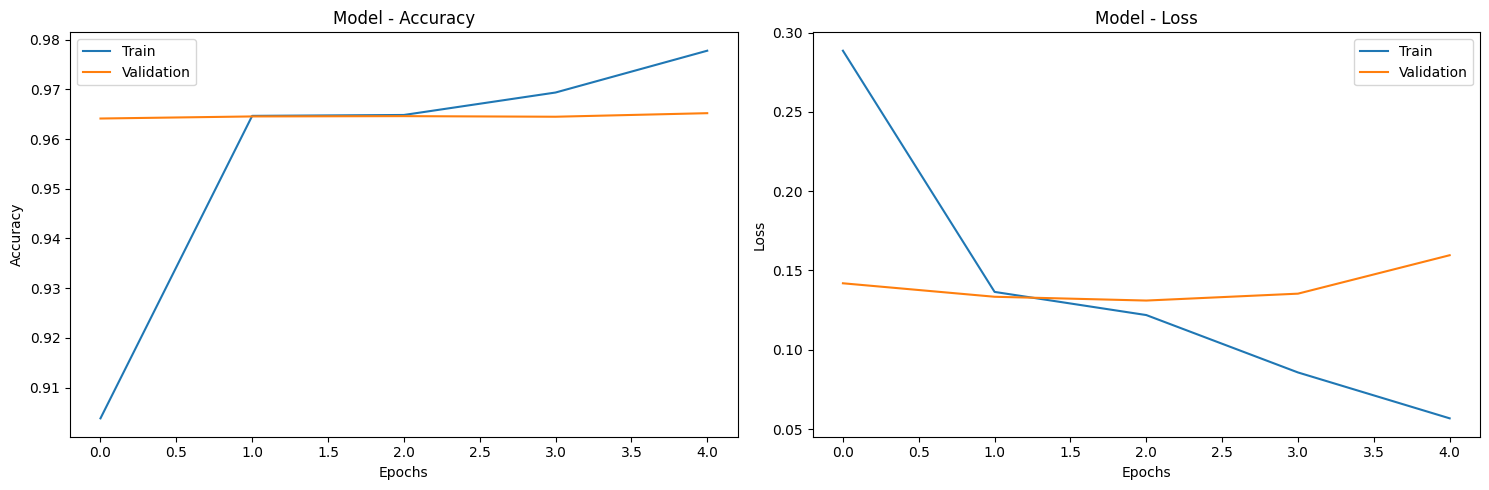

In [27]:
import matplotlib.pyplot as plt

# Extract metrics from history
metrics = ["accuracy", "loss"]
history_dict = bert_history.history

fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 Row × 2 Cols (Metrics)

for col, metric in enumerate(metrics):
    ax = axes[col]

    ax.plot(history_dict[metric], label="Train")
    ax.plot(history_dict[f"val_{metric}"], label="Validation")
    ax.set_title(f"Model - {metric.capitalize()}")
    ax.set_xlabel("Epochs")
    ax.set_ylabel(metric.capitalize())
    ax.legend()

plt.tight_layout()
plt.show()

#### Performance and Visualizations on Test Dataset

In [32]:


class CustomTokenizer_Test:
    def __init__(self,tokenizer,max_len):
        self.spell = SpellChecker()
        self.word2idx = tokenizer['word2idx']
        self.label2idx = tokenizer['label2idx']
        self.idx2word = tokenizer['idx2word']
        self.idx2label = tokenizer['idx2label']
        self.max_len=max_len
        self.n_tags=len(self.label2idx)

    def clean_text(self, sentence):
        tokens = sentence  # Tokenize text

        # Replace special tokens
        tokens = [re.sub(r"https?://\S+|www\.\S+", "<URL>", word) for word in tokens]
        tokens = [re.sub(r"@[A-Za-z0-9_]+", "<MENTION>", word) for word in tokens]
        tokens = [re.sub(r"\brt\b", "<RT>", word) for word in tokens]
        tokens = [wordninja.split(word) if len(re.findall(r'[^a-zA-Z]',word))==0 else [word] for word in tokens]  # Split concatenated words
        tokens = [subword for word in tokens for subword in word]  # Flatten list

        ignore_toks=["<URL>","<MENTION>","<RT>"]
        pos_tags = pos_tag(tokens)
        non_nouns = [word for word, tag in pos_tags if not tag.startswith("NN")]  # Non-nouns


        # Spell check only non-noun words
        tokens = [
            self.spell.correction(word) if (word not in self.spell.known([word])) and (word not in ignore_toks) and
            (word in non_nouns) and (self.spell.correction(word) is not None) else word
            for word in tokens
        ]

        return tokens

    def update_labels(self,original_tokens, cleaned_tokens, labels):
      #print(original_tokens,"\n", cleaned_tokens,"\n", labels)
      new_labels = []
      original_idx = 0
      label="O"

      for cleaned_word in cleaned_tokens:
          if original_idx < len(original_tokens)-1 and cleaned_word in original_tokens[original_idx]:
              label = labels[original_idx]
              new_labels.append(label)
          elif original_idx < len(original_tokens)-1 and cleaned_word in original_tokens[original_idx+1]:
              label = labels[original_idx+1]
              original_idx += 1
              new_labels.append(label)
          else:
              new_labels.append(label)  # Maintain previous label for expanded parts

      return new_labels


    def transform(self, dataset):
        sentences, labels = [], []

        for i in tqdm(range(len(dataset)),desc='Cleaned Test Text', total= len(dataset)):
            sentence=dataset[i][0]
            label=dataset[i][1]
            cleaned_tokens = self.clean_text(sentence)
            updated_labels = self.update_labels(sentence, cleaned_tokens, label)
            sentences.append(cleaned_tokens)
            labels.append(updated_labels)

        # Convert each sentence from list of Token to list of word_index
        X_test_token_ids = [[self.word2idx.get(w, self.word2idx["<UNK>"]) for w in s] for s in sentences]

        # Padding each sentence to have the same lenght
        X_test_token_ids = pad_sequences(maxlen=self.max_len, sequences=X_test_token_ids, padding="post", value=self.word2idx["<PAD>"])

        # Convert Tag/Label to tag_index
        X_test_labels = [[self.label2idx[w] for w in s] for s in labels]

        # Padding each sentence to have the same lenght
        X_test_labels = pad_sequences(maxlen=self.max_len, sequences=X_test_labels, padding="post", value=self.label2idx["<PAD>"])

        X_test_padded_sent= [sent+["<PAD>"]*(0 if self.max_len-len(sent)<0 else self.max_len-len(sent)) for sent in sentences]

        # One-Hot encode
        X_test_cat_labels = np.array([to_categorical(i, num_classes=self.n_tags) for i in X_test_labels])

        print(f"X_test_token_ids shape: {X_test_token_ids.shape}")
        print(f"X_test_labels shape: {X_test_labels.shape}")

        # Generate segment_ids (all 0s) and attention_mask (1 for tokens, 0 for pad)
        segment_ids = np.zeros_like(X_test_token_ids)
        attention_mask = (X_test_token_ids != self.word2idx["<PAD>"]).astype(int)




        dataset=pd.DataFrame(dataset, columns=['Sentence', 'Label_modified'])
        dataset["token_id"] = list(X_test_token_ids)
        dataset["label_id"] = list(X_test_labels)
        dataset["segment_id"] = list(segment_ids)
        dataset["attention_mask"] = list(attention_mask)
        dataset["categorical_labels"] = list(X_test_cat_labels)
        dataset["padded_sentence"] = list(X_test_padded_sent)

        return dataset




from transformers import BertTokenizer as bt
class BertNERTokenizer_Test:
    def __init__(self, tokenizer, model_name='bert-base-uncased', max_len=30):
        self.tokenizer = bt.from_pretrained(model_name)
        self.word2idx = tokenizer['word2idx']
        self.label2idx = tokenizer['label2idx']
        self.idx2word = tokenizer['idx2word']
        self.idx2label = tokenizer['idx2label']
        self.max_len = max_len
        self.n_tags = len(self.label2idx)

    def tokenize(self, sentence, labels):
        tokens, new_labels = [], []

        for word, label in zip(sentence, labels):
            tokenized_word = self.tokenizer.tokenize(word)  # Tokenize using BERT
            tokens.extend(tokenized_word)
            new_labels.extend([label] + [label] * (len(tokenized_word) - 1))  # Align labels

        return tokens, new_labels

    def transform(self, dataset):
        sentences, labels = [], []

        for i in tqdm(range(len(dataset)),desc='Cleaned Test Text', total= len(dataset)):
            sentence=dataset[i][0]
            label=dataset[i][1]
            tokenized_sentence, tokenized_labels = self.tokenize(sentence, label)
            sentences.append(tokenized_sentence)
            labels.append(tokenized_labels)

        # Convert tokens to input IDs
        X_test_token_ids = [[self.word2idx.get(w, self.word2idx["<UNK>"]) for w in s] for s in sentences]

        # Padding sequences
        X_test_token_ids = pad_sequences(maxlen=self.max_len, sequences=X_test_token_ids, padding="post", value=self.word2idx["<PAD>"])

        # Convert labels to label IDs
        X_test_labels = [[self.label2idx[w] for w in s] for s in labels]

        # Padding labels
        X_test_labels = pad_sequences(maxlen=self.max_len, sequences=X_test_labels, padding="post", value=self.label2idx["<PAD>"])

        X_test_padded_sent= [sent+["<PAD>"]*(0 if self.max_len-len(sent)<0 else self.max_len-len(sent)) for sent in sentences]

        # One-hot encode labels
        X_test_cat_labels = np.array([to_categorical(i, num_classes=self.n_tags) for i in X_test_labels])

        # Generate segment_ids (all 0s) and attention_mask (1 for tokens, 0 for padding)
        segment_ids = np.zeros_like(X_test_token_ids)
        attention_mask = (X_test_token_ids != self.word2idx["<PAD>"]).astype(int)

        dataset=pd.DataFrame(dataset, columns=['Sentence', 'Label_modified'])
        dataset["token_id"] = list(X_test_token_ids)
        dataset["label_id"] = list(X_test_labels)
        dataset["segment_id"] = list(segment_ids)
        dataset["attention_mask"] = list(attention_mask)
        dataset["categorical_labels"] = list(X_test_cat_labels)
        dataset["padded_sentence"] = list(X_test_padded_sent)

        return dataset

In [33]:
# import os
# os.kill(os.getpid(),9)


##### Performance on CRF+LSTM Model

In [34]:
custom_tokenizer=joblib.load("custom_tokenizer.pkl")

model_path=r'twitter_ner_crf_best_model/best_model_weights.h5'
custom_objects = {
    "SigmoidFocalCrossEntropyLoss": SigmoidFocalCrossEntropyLoss(label2idx=custom_tokenizer['class_weights'],alpha=custom_tokenizer['class_weights']),
    "NDCGMetric": NDCGMetric,
    "CRF": CRF,
    "MaskedAccuracy": MaskedAccuracy
}

word2idx=custom_tokenizer['word2idx']
embedding_dim=200
#MAX_LEN=35
word2vec_embeddings=np.array([[0 for _ in range(embedding_dim)] for _ in range(len(word2idx))])

loaded_model = build_model(word2vec_embeddings,max_len=MAX_LEN, input_dim=len(custom_tokenizer['word2idx'])
                ,label2idx=custom_tokenizer['label2idx'],class_weights=custom_tokenizer['class_weights'], embedding_dim=embedding_dim)
loaded_model.load_weights(model_path)

file_path = "wnut 16test.txt.conll"

test_df,test_dataset=uncleaned_procure_datatset(file_path)
tt=list(test_dataset[['Sentence','Label_modified']].values) #[:10]

tokenizer_test=CustomTokenizer_Test(tokenizer=custom_tokenizer,max_len=MAX_LEN)
clean_test_dataset=tokenizer_test.transform(tt)

X_test = np.array(list(clean_test_dataset["token_id"]))
y_test = np.array(list(clean_test_dataset["categorical_labels"]))
test_loss, test_accuracy, test_ndcg = loaded_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test NDCG@3: {test_ndcg:.4f}")



Cleaned Test Text: 100%|██████████| 3850/3850 [25:38<00:00,  2.50it/s]


X_test_token_ids shape: (3850, 35)
X_test_labels shape: (3850, 35)
121/121 [==============================] - 5s 36ms/step - loss: 3.5662e-04 - accuracy: 0.9201 - ndcg_at_3: 0.7308
Test Loss: 0.0004
Test Accuracy: 0.9201
Test NDCG@3: 0.7308


##### Performance on BERT Model

In [35]:

bert_tokenizer=joblib.load("bert_tokenizer.pkl")

word2idx=bert_tokenizer['word2idx']
embedding_dim=200
#MAX_LEN=30

bert_model_path=r'twitter_ner_bert_best_model/best_model_weights.h5'

custom_objects = {"TFBertLayer":TFBertLayer} #add the custom TFBertLayer
bert_loaded_model = build_bert_model(max_len=MAX_LEN, tags_2_idx=bert_tokenizer['label2idx'])
bert_loaded_model.load_weights(bert_model_path)


bert_test_df,bert_test_dataset=uncleaned_procure_datatset(file_path)
tt=list(test_dataset[['Sentence','Label_modified']].values) #[:10]

berttokenizer_test=BertNERTokenizer_Test(tokenizer=bert_tokenizer, model_name='bert-base-uncased', max_len=MAX_LEN)
bertclean_test_dataset=berttokenizer_test.transform(tt)

X_test1 = np.array(list(bertclean_test_dataset["token_id"]))
X_test2 = np.array(list(bertclean_test_dataset["segment_id"]))
X_test3 = np.array(list(bertclean_test_dataset["attention_mask"]))
y_test1 = np.array(list(bertclean_test_dataset["label_id"])) #categorical_labels
bert_test_loss, bert_test_accuracy = bert_loaded_model.evaluate([X_test1, X_test2, X_test3],
                                                                                y_test1)

print(f"Test Loss: {bert_test_loss:.4f}")
print(f"Test Accuracy: {bert_test_accuracy:.4f}")

All PyTorch model weights were used when initializing TFBertForTokenClassification.

Some weights or buffers of the TF 2.0 model TFBertForTokenClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Cleaned Test Text: 100%|██████████| 3850/3850 [00:07<00:00, 515.97it/s] 


121/121 [==============================] - 456s 4s/step - loss: 0.1825 - accuracy: 0.9498
Test Loss: 0.1825
Test Accuracy: 0.9498


#### LSTM+CRF confusion matrix

121/121 [==============================] - 3s 14ms/step


,Label,Accuracy,Avg Loss,Avg NDCG
0,E,0.0,1.302863,0.63093
1,O,1.0,0.458106,1.00000


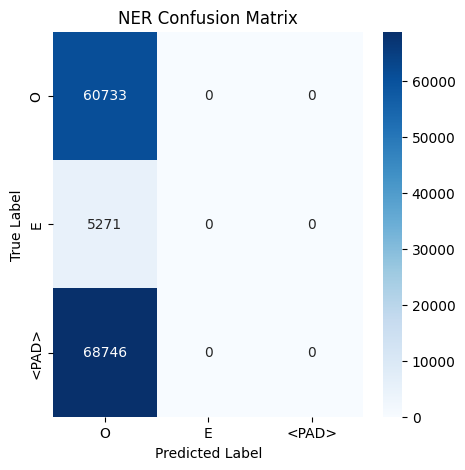


Classification Report:
              precision    recall  f1-score   support

           O     0.0000    0.0000    0.0000     68746
           E     0.0000    0.0000    0.0000      5271
       <PAD>     0.4507    1.0000    0.6214     60733

    accuracy                         0.4507    134750
   macro avg     0.1502    0.3333    0.2071    134750
weighted avg     0.2031    0.4507    0.2801    134750



In [36]:
from scipy.special import softmax

def calculate_per_entity_score(tokenizer,X_test,loaded_model):
    # Get model predictions
    y_pred_logits = loaded_model.predict(X_test)["potentials"]  # Shape: (num_samples, MAX_LEN, n_tags)
    y_pred_logits = softmax(y_pred_logits, axis=-1)

    y_pred_indices = np.argmax(y_pred_logits, axis=-1)  # Convert probabilities to class indices
    y_true_indices = np.argmax(y_test, axis=-1)  # True labels

    # Initialize label-wise metric storage
    label_accuracy = {}
    label_counts = {}
    label_ndcg = {}
    label_loss = {}

    try:
        rows=X_test.shape[0]
    except:
        rows=X_test[0].shape[0]


    # Iterate over each sentence
    for i in range(rows):
        for j in range(MAX_LEN):
            true_idx = y_true_indices[i][j]
            pred_idx = y_pred_indices[i][j]

            # Ignore padding tokens
            if true_idx == tokenizer['label2idx']["<PAD>"]:
                continue

            true_label = tokenizer['idx2label'][true_idx]
            pred_label = tokenizer['idx2label'][pred_idx]

            # Update accuracy tracking
            if true_label not in label_accuracy:
                label_accuracy[true_label] = 0
                label_counts[true_label] = 0

            label_accuracy[true_label] += (true_label == pred_label)
            label_counts[true_label] += 1

            # Compute per-label loss (assuming cross-entropy loss)
            if true_label not in label_loss:
                label_loss[true_label] = []

            label_loss[true_label].append(-np.log(y_pred_logits[i, j, true_idx] + 1e-10))  # Avoid log(0)

            # Compute per-label NDCG (Using relevance score = predicted probability of true class)
            if true_label not in label_ndcg:
                label_ndcg[true_label] = []

            sorted_probs = np.sort(y_pred_logits[i, j, :])[::-1]  # Sort class probabilities
            true_class_prob = y_pred_logits[i, j, true_idx]  # Probability assigned to the true class
            rank = np.where(sorted_probs == true_class_prob)[0][0] + 1  # Rank in sorted list

            if rank <= 3:  # Compute NDCG@3
                ndcg_score = 1 / np.log2(rank + 1)
            else:
                ndcg_score = 0  # Out of top 3

            label_ndcg[true_label].append(ndcg_score)

    dff=pd.DataFrame()
    # Compute final per-label statistics
    for label in label_accuracy.keys():
        accuracy = label_accuracy[label] / label_counts[label]
        avg_loss = np.mean(label_loss[label]) if label_loss[label] else 0
        avg_ndcg = np.mean(label_ndcg[label]) if label_ndcg[label] else 0

        dff=pd.concat([dff,pd.DataFrame({"Label":label,"Accuracy":accuracy,"Avg Loss":avg_loss,"Avg NDCG":avg_ndcg},index=[0])],axis=0,ignore_index=True)

    display(dff)

    # Flatten the lists while removing padding tokens
    y_true_flat, y_pred_flat = [], []

    for i in range(rows):
        for j in range(MAX_LEN):
            true_idx = y_true_indices[i][j]
            pred_idx = y_pred_indices[i][j]

            #if true_idx == tokenizer['label2idx']["<PAD>"]:  # Ignore padding tokens
            #    continue

            y_true_flat.append(tokenizer['idx2label'][true_idx])  # Convert index to tag
            y_pred_flat.append(tokenizer['idx2label'][pred_idx])

    # Get unique label names in the dataset
    unique_labels = list(tokenizer['label2idx'].keys())
    #unique_labels.remove("<PAD>")  # Remove padding from labels

    # Compute Confusion Matrix
    cm = confusion_matrix(y_true_flat, y_pred_flat, labels=unique_labels)

    # Plot Confusion Matrix
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("NER Confusion Matrix")
    plt.show()

    # Print Classification Report
    print("\nClassification Report:")
    print(classification_report(y_true_flat, y_pred_flat, target_names=unique_labels, digits=4))

calculate_per_entity_score(custom_tokenizer,X_test,loaded_model)

#### Bert Model confusion matrix

121/121 [==============================] - 440s 4s/step


,Label,Accuracy,Avg Loss,Avg NDCG
0,E,0.003415,3.393449,0.631644
1,O,0.997958,0.058240,0.999242


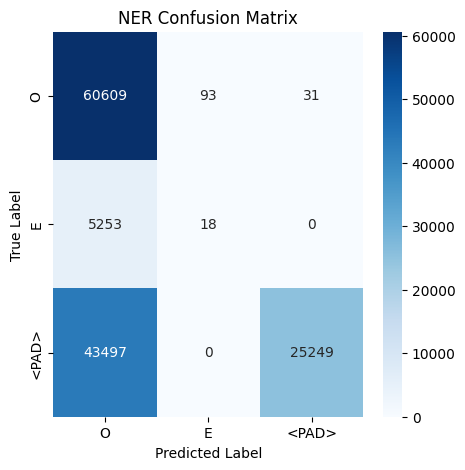


Classification Report:
              precision    recall  f1-score   support

           O     0.9988    0.3673    0.5371     68746
           E     0.1622    0.0034    0.0067      5271
       <PAD>     0.5542    0.9980    0.7127     60733

    accuracy                         0.6373    134750
   macro avg     0.5717    0.4562    0.4188    134750
weighted avg     0.7657    0.6373    0.5955    134750



In [37]:

calculate_per_entity_score(bert_tokenizer,[X_test1, X_test2, X_test3],bert_loaded_model)

In [38]:
def get_predicted_entities(all_prediction, sub_sentence,ignore_labels):

    final_kwords = []
    for i, prediction in enumerate(all_prediction):
        tkns = sub_sentence[i]
        kword = ''
        kword_list = []
        #print(prediction)

        for k, j in enumerate(prediction):
            if (len(prediction)>1):
                if (j not in ignore_labels) & (k==0):
                    # If it's the first word in the first position
                    begin = tkns[k]
                    kword = begin
                elif (j not in ignore_labels) & (k>=1) & (prediction[k-1]==0):
                    # Begin word is in the middle of the sentence
                    begin = tkns[k]
                    previous = tkns[k-1]

                    if begin.startswith('##'):
                        kword = previous + begin[2:]
                    else:
                        kword = begin

                    if k == (len(prediction) - 1):
                        kword_list.append(kword.rstrip().lstrip())
                elif (j not in ignore_labels) & (k>=1) & (prediction[k-1]!=0):
                    # Intermediate word of the same keyword
                    inter = tkns[k]

                    if inter.startswith('##'):
                        kword = kword + "" + inter[2:]
                    else:
                        kword = kword + " " + inter


                    if k == (len(prediction) - 1):
                        kword_list.append(kword.rstrip().lstrip())
                elif (j in ignore_labels) & (k>=1) & (prediction[k-1] !=0):
                    # End of a keywords but not end of sentence.
                    kword_list.append(kword.rstrip().lstrip())
                    kword = ''
                    inter = ''
            else:
                if (j not in ignore_labels):
                    begin = tkns[k]
                    kword = begin
                    kword_list.append(kword.rstrip().lstrip())

        final_kwords.append(kword_list)
    return final_kwords







#### Visualize Entities using LSTM+CRF Model

1/1 [==============================] - 0s 28ms/step

Tweet 1: new orleans mother mother's day parade shooting . one of the people hurt was a 10-year-old girl . what the hell is wrong with people ?
Cleaned Tweet 1: new orleans mother mother's day parade shooting . one of the people hurt was a <UNK> girl . what the hell is wrong with people ?
True Labels: ['E', 'E', 'E', 'E', 'E', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


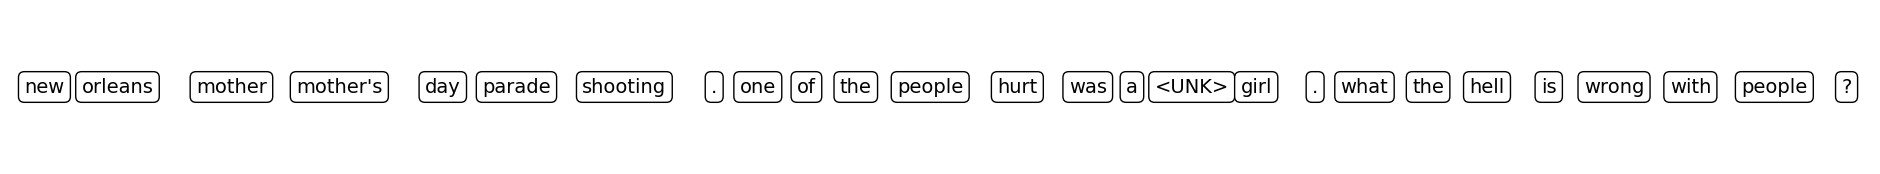


Tweet 2: rt @hxranspizza : going into school tomorrow like #kca #vote1duk http://t.co/vvkoeemjmx
Cleaned Tweet 2: <RT> <MENTION> : going into school tomorrow like <UNK> <UNK> <URL>
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


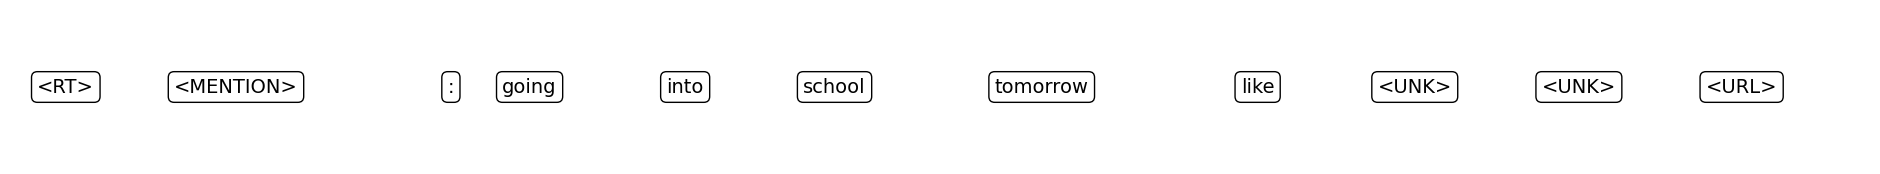


Tweet 3: may e just a smile in your heart eily countdownbegins #pushawardslizquens
Cleaned Tweet 3: may e just a smile in your heart <UNK> my <UNK> <UNK> <UNK>
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'E', 'E', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


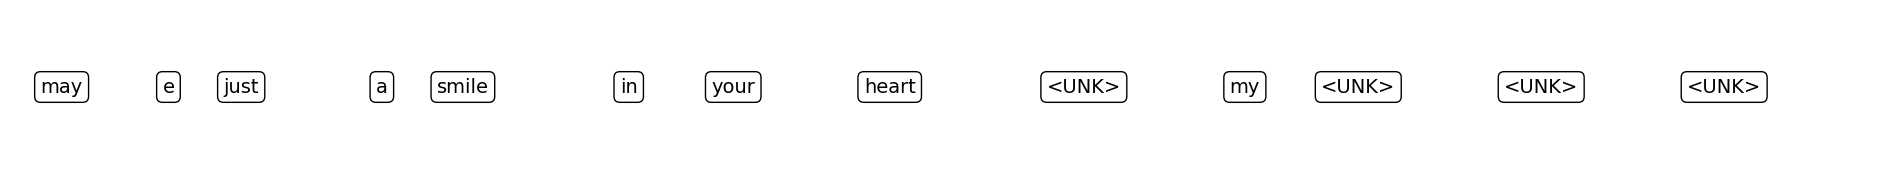


Tweet 4: i could so do thursday club right now
Cleaned Tweet 4: i could so do thursday club right now
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


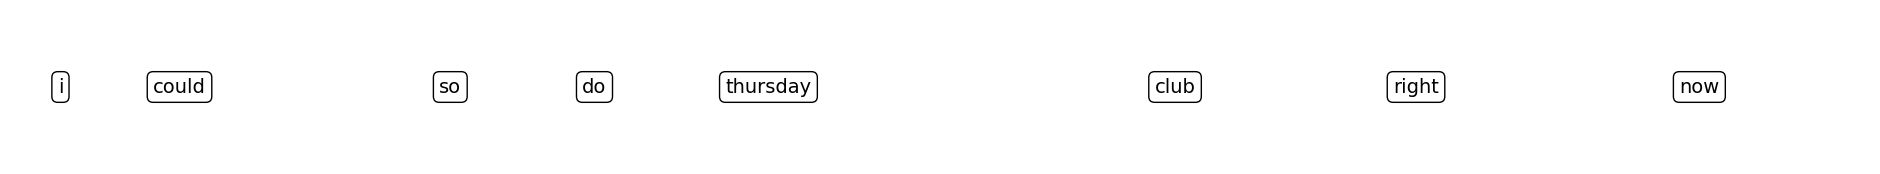


Tweet 5: @therealdaftbear albert nobbs ( glenn close)is a woman living as a man in order to find work in the harsh environment of 19th-century ireland
Cleaned Tweet 5: <MENTION> <UNK> no <UNK> ( <UNK> <UNK> a woman living as a man in order to find work in the harsh <UNK> of <UNK> <UNK>
True Labels: ['O', 'E', 'E', 'E', 'O', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


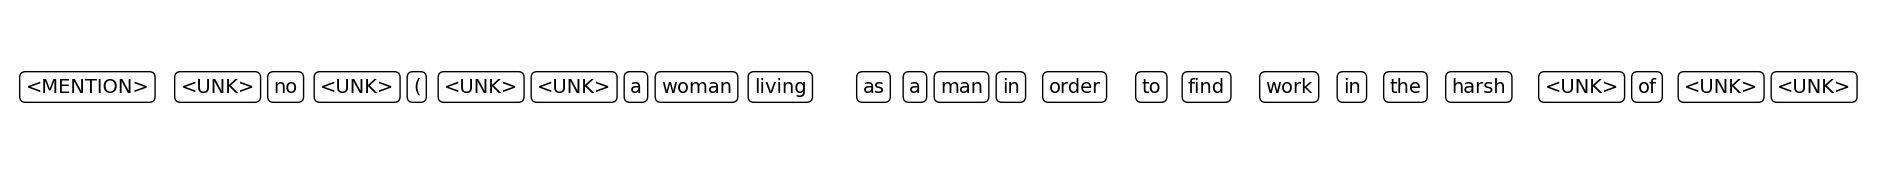

In [39]:

def visualize_ner(tokenizer, X_test,loaded_model,test_dataset,clean_test_dataset):

    try:
        rows=X_test.shape[0]
        y_pred_logits = loaded_model.predict(X_test[:5])["potentials"]  # Get predictions for the first 5 sentences
        y_pred_logits = softmax(y_pred_logits, axis=-1)
        y_pred_indices = np.argmax(y_pred_logits, axis=-1)  # Convert probabilities to class indices
    except:
        rows=X_test[0].shape[0]
        y_pred_logits = loaded_model.predict(X_test[:5])["potentials"]  # Get predictions for the first 5 sentences
        y_pred_logits = softmax(y_pred_logits, axis=-1)
        y_pred_indices = np.argmax(y_pred_logits, axis=-1)  # Convert probabilities to class indices
        X_test=X_test[0]


    def visualize_ner(tokens, labels):
        plt.figure(figsize=(24, 2))
        ax = plt.gca()
        ax.set_xticks([])
        ax.set_yticks([])

        text_x = 0.05
        text_y = 0.5

        for token, label in zip(tokens, labels):
            color = "lightblue" if label != "O" else "white"
            bbox_props = dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor=color)
            plt.text(text_x, text_y, token, ha="left", va="center", fontsize=14, bbox=bbox_props)

            if label != "O":
                plt.text(text_x, text_y - 0.3, label, ha="left", va="center", fontsize=10, color="red")

            text_x += len(token) * 0.05 + 0.05

        plt.xlim(0, text_x)
        plt.ylim(0, 1)
        plt.axis("off")
        plt.show()

    validation_predictions= get_predicted_entities(all_prediction = y_pred_indices,
                                               sub_sentence = clean_test_dataset.iloc[:rows].padded_sentence.values,
                                                   ignore_labels=[tokenizer['label2idx']['O'],tokenizer['label2idx']['<PAD>']])

    # Convert back to words and labels
    for i in range(5):  # Loop through first 5 sentences
        sentence_tokens = [tokenizer['idx2word'][idx] for idx in X_test[i] if idx != tokenizer['word2idx']["<PAD>"]]
        true_labels = [tokenizer['idx2label'][idx] for idx in np.argmax(y_test[i], axis=-1) if idx != tokenizer['label2idx']["<PAD>"]]
        pred_labels = [tokenizer['idx2label'][idx] for idx in y_pred_indices[i] if idx != tokenizer['label2idx']["<PAD>"]]#[:len(true_labels)]

        print(f"\nTweet {i+1}: {' '.join(list(test_dataset.iloc[i].Sentence))}")
        print(f"Cleaned Tweet {i+1}: {' '.join(sentence_tokens)}")
        print(f"True Labels: {true_labels}")
        print(f"Predicted Labels: {pred_labels}")
        en=[s for s in validation_predictions[i] if ("<PAD>" not in s) and (len(s)>1)]
        print(f"Entities: {en}")

        # Call visualization function
        visualize_ner(sentence_tokens, pred_labels)

visualize_ner(custom_tokenizer, X_test,loaded_model,test_dataset,clean_test_dataset)

#### Visualize Entities using BERT Model

121/121 [==============================] - 427s 4s/step

Tweet 1: new orleans mother mother's day parade shooting . one of the people hurt was a 10-year-old girl . what the hell is wrong with people ?
Cleaned Tweet 1: new orleans mother mother ' s day parade shooting . one of the people hurt was a 10 - year - old girl . what the hell is wrong with people ?
True Labels: ['E', 'E', 'E', 'E', 'E', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


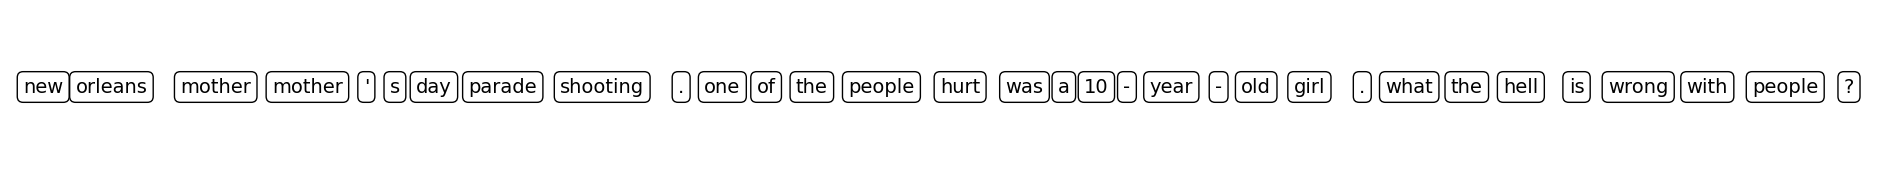


Tweet 2: rt @hxranspizza : going into school tomorrow like #kca #vote1duk http://t.co/vvkoeemjmx
Cleaned Tweet 2: rt @ h ##x ##ran ##sp ##iz ##za : going into school tomorrow like # kc ##a # vote ##1 ##duk http : / / t . co / v ##v ##ko ##eem ##jm ##x
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


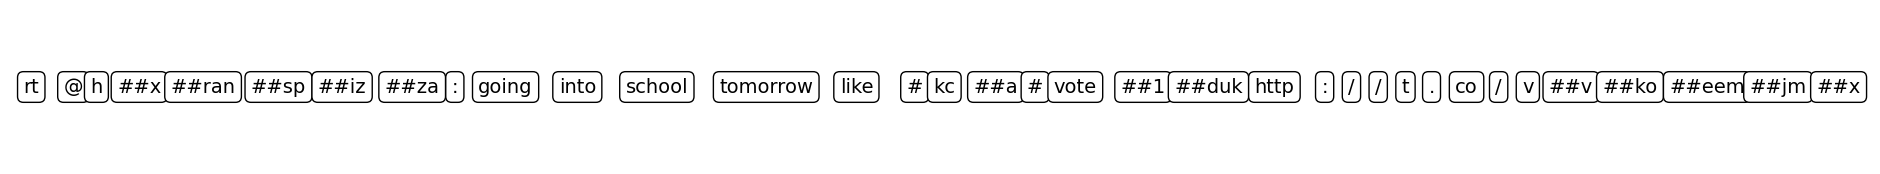


Tweet 3: may e just a smile in your heart eily countdownbegins #pushawardslizquens
Cleaned Tweet 3: may e just a smile in your heart e ##ily <UNK> ##be <UNK> # push <UNK> <UNK> ##li ##z ##que ##ns
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'E', 'E', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


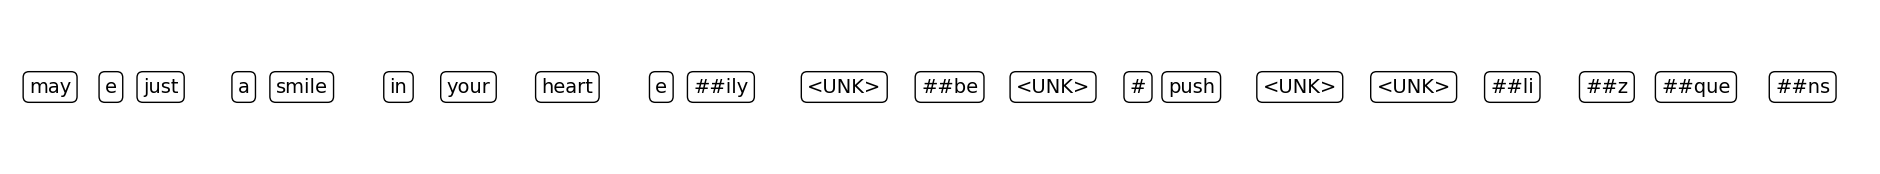


Tweet 4: i could so do thursday club right now
Cleaned Tweet 4: i could so do thursday club right now
True Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


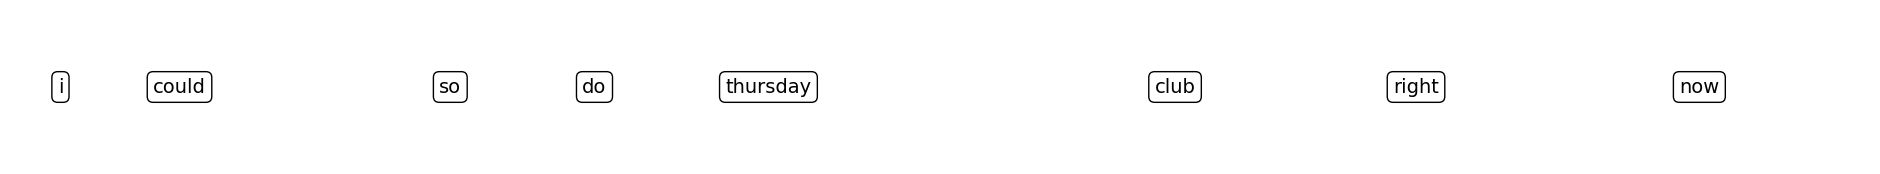


Tweet 5: @therealdaftbear albert nobbs ( glenn close)is a woman living as a man in order to find work in the harsh environment of 19th-century ireland
Cleaned Tweet 5: @ there ##ald ##af ##t ##be ##ar <UNK> no <UNK> ( <UNK> close ) is a woman living as a man in order to find work in the harsh <UNK> of 19th - century <UNK>
True Labels: ['O', 'E', 'E', 'E', 'O', 'E', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Predicted Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']
Entities: []


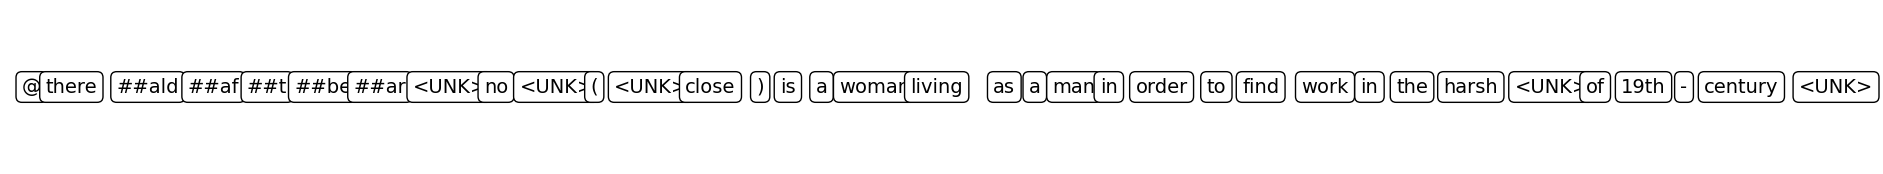

In [40]:
visualize_ner(bert_tokenizer,[X_test1, X_test2, X_test3],bert_loaded_model,bert_test_dataset,bertclean_test_dataset)

# Data Preprocessing & Tokenization

1. Lowercased text and expanded contractions.
2. Implemented a Custom Tokenizer (Word2Vec-based) and a BERT Tokenizer:
3. **Custom Tokenizer**: Spell-checking, word segmentation, special token replacement, and pre-trained Word2Vec embeddings.
4. **BERT Tokenizer**: Subword tokenization while preserving entity labels.

# Dataset Preparation

1. Processed tokenized text into lists of token IDs, attention masks, segment IDs, and label IDs (both one-hot and label-coded).
2. Padded sequences and split the dataset into train & validation sets.
3. Calculated class weights to balance the model, adjusting for rare entities and reducing weight for "O" labels.

# Model Training & Performance

Two models were trained:

- **BiLSTM+CRF**: Leveraged a custom tokenizer and CRF-based sequence modeling.
- **BERT-based model**: Fine-tuned `bert-base-uncased` for token classification.

The **BiLSTM+CRF model failed to recognize entities**, predicting every token as "O," despite achieving a high overall accuracy. This suggests that while it handled majority class tokens well, it struggled with rare entity labels. The use of **Sigmoid Focal Loss** with class weighting did not improve entity recognition.

In contrast, the **BERT model performed significantly better**, achieving higher accuracy while still facing challenges in entity classification. Although it improved upon the custom model, it still struggled to correctly classify non-"O" labels, highlighting the difficulty in learning entity boundaries with limited data.

# Key Takeaways

- **BiLSTM+CRF failed to capture entities**, likely due to limitations in feature extraction or ineffective class weighting.
- **BERT outperformed BiLSTM+CRF**, but still had difficulty with rare entity labels, suggesting that more data or better entity-specific augmentation could improve results.
- **Future improvements** could involve increasing data size, fine-tuning hyperparameters, and trying more sophisticated regularization techniques.

# Deployment

A **Streamlit app was created using the BERT model**, making the trained model accessible for real-world use.
